In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("okcupid.csv")

df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,profile_completeness,essay_word_count,profile_views_last_month,messages_sent_last_week,likes_received,mutual_matches,time_spent_daily,swipe_right_ratio,swipe_right_label
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,100,450,1176,20,147,39,52,0.69,Optimistic
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",60,268,1509,7,76,32,41,0.56,Balanced
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",90,856,910,21,221,129,29,0.65,Optimistic
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",70,75,1344,19,57,15,67,0.61,Optimistic
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,50,105,1180,12,57,25,29,0.36,Balanced


In [4]:
# reviso el tamaño del df

print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 59946, y el número de columnas es 30


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,59946.0,32.340290,9.452779,18.00,26.00,30.00,37.00,110.00
height,59943.0,68.295281,3.994803,1.00,66.00,68.00,71.00,95.00
income,59946.0,20033.222534,97346.192104,-1.00,-1.00,-1.00,-1.00,1000000.00
profile_completeness,59946.0,81.047776,27.988025,0.00,70.00,90.00,100.00,100.00
essay_word_count,59946.0,356.896106,295.830482,0.00,159.00,299.00,481.00,10602.00
profile_views_last_month,59946.0,1029.695726,561.287949,50.00,547.00,1033.00,1515.75,1999.00
messages_sent_last_week,59946.0,11.573733,8.537646,0.00,4.00,11.00,18.00,29.00
likes_received,59946.0,111.627031,67.180995,0.00,71.00,105.00,144.00,2174.00
mutual_matches,59946.0,38.718764,30.169834,0.00,18.00,32.00,53.00,665.00
time_spent_daily,59946.0,61.770794,20.187392,5.00,48.00,62.00,75.00,142.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       59946 non-null  int64  
 1   status                    59946 non-null  object 
 2   sex                       59946 non-null  object 
 3   orientation               59946 non-null  object 
 4   body_type                 54650 non-null  object 
 5   diet                      35551 non-null  object 
 6   drinks                    56961 non-null  object 
 7   drugs                     45866 non-null  object 
 8   education                 53318 non-null  object 
 9   ethnicity                 54266 non-null  object 
 10  height                    59943 non-null  float64
 11  income                    59946 non-null  int64  
 12  job                       51748 non-null  object 
 13  last_online               59946 non-null  object 
 14  locati

In [7]:
# Detecto las columnas objects:

col_objects = df.select_dtypes(include='object').columns.tolist()

print(f"Hay {len(col_objects)} columnas categóricas:")
print(col_objects)


Hay 19 columnas categóricas:
['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'last_online', 'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks', 'swipe_right_label']


In [8]:
# Detecto las columnas numericas:

col_num = df.select_dtypes(exclude='object').columns.tolist()

print(f"Hay {len(col_num)} columnas numericas:")
print(col_num)

Hay 11 columnas numericas:
['age', 'height', 'income', 'profile_completeness', 'essay_word_count', 'profile_views_last_month', 'messages_sent_last_week', 'likes_received', 'mutual_matches', 'time_spent_daily', 'swipe_right_ratio']


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

age                            54
status                          5
sex                             2
orientation                     3
body_type                      12
diet                           18
drinks                          6
drugs                           3
education                      32
ethnicity                     217
height                         60
income                         13
job                            21
last_online                 30123
location                      199
offspring                      15
pets                           15
religion                       45
sign                           48
smokes                          5
speaks                       7647
profile_completeness           11
essay_word_count             1786
profile_views_last_month     1950
messages_sent_last_week        30
likes_received                541
mutual_matches                270
time_spent_daily              134
swipe_right_ratio              91
swipe_right_la

In [11]:
for columna in df:
    print(f'La columna {columna} tiene estos valores únicos:')
    print(df[columna].unique())
    print('----------------------------')

La columna age tiene estos valores únicos:
[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
----------------------------
La columna status tiene estos valores únicos:
['single' 'available' 'seeing someone' 'married' 'unknown']
----------------------------
La columna sex tiene estos valores únicos:
['m' 'f']
----------------------------
La columna orientation tiene estos valores únicos:
['straight' 'bisexual' 'gay']
----------------------------
La columna body_type tiene estos valores únicos:
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
----------------------------
La columna diet tiene estos valores únicos:
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'


In [12]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)


offspring                   59.321723
diet                        40.694959
religion                    33.740366
pets                        33.231575
drugs                       23.487806
sign                        18.443266
job                         13.675641
education                   11.056618
ethnicity                    9.475194
smokes                       9.194942
body_type                    8.834618
drinks                       4.979482
speaks                       0.083408
height                       0.005005
likes_received               0.000000
messages_sent_last_week      0.000000
profile_views_last_month     0.000000
mutual_matches               0.000000
essay_word_count             0.000000
time_spent_daily             0.000000
swipe_right_ratio            0.000000
age                          0.000000
profile_completeness         0.000000
status                       0.000000
location                     0.000000
last_online                  0.000000
income      

# Revision de columnas con Nulos.

In [13]:
# reviso columna OFFSPRING 

df['offspring'].value_counts(dropna=False) #dropna=False -> Te muestra todos los valores, incluyendo cuántos NaN hay.


offspring
NaN                                        35561
doesn't have kids                           7560
doesn't have kids, but might want them      3875
doesn't have kids, but wants them           3565
doesn't want kids                           2927
has kids                                    1883
has a kid                                   1881
doesn't have kids, and doesn't want any     1132
has kids, but doesn't want more              442
has a kid, but doesn't want more             275
has a kid, and might want more               231
wants kids                                   225
might want kids                              182
has kids, and might want more                115
has a kid, and wants more                     71
has kids, and wants more                      21
Name: count, dtype: int64

📊 Lo que vemos:
Hay 35.561 NaN → eso es un 71% de nulos (algo más alto de lo que veíamos antes, seguramente por limpieza previa).
Las respuestas son muy variadas pero algo redundantes, por ejemplo:
"Has A Kid" y "Has Kids" → podrían agruparse
"Doesn't Have Kids" y "Doesn't Have Kids, But Wants Them" → también
Algunas respuestas son poco frecuentes

🧠 ¿Qué podrías hacer?
💡 Opción 1: Agrupar en 3–5 categorías más generales
Ejemplo:
Categoría original	Nueva categoría propuesta
Has Kids / Has A Kid / ...	               Has kids
Doesn’t have kids (todas las variantes)	   Doesn’t have kids
Doesn’t want kids / Doesn’t want more	   Doesn’t want kids
Wants kids / Might want kids	           Wants kids
NaN	                                       Not declared


O ELIMINAR LA COMULNA:

df.drop(columns='offspring', inplace=True)


In [14]:
# Creamos funcion para agrupar en 4 categorias para hacerlo mas manejable: No declarado, quiere hijos, no quiere hijos, tiene hijos:

def agrupar_offspring(valor):
    if pd.isna(valor):   # si es NAN (valor nulo) 
        return 'Not declared'  # devuelve "no declarado"
    valor = valor.lower()  # convierte el texto en minuscula 
    if 'has' in valor:
        return 'Has kids'
    elif 'want' in valor:
        return 'Wants kids'
    elif "doesn't have" in valor:
        return "Doesn't have kids"
    elif "doesn't want" in valor:
        return "Doesn't want kids"
    else:
        return 'Other'

df['offspring_grouped'] = df['offspring'].apply(agrupar_offspring)  # esto crea una nueva columna llamada "offspring_grouped" con valores ya agrupados.


In [15]:
df['offspring_grouped'].value_counts(dropna=False) # reviso como ha quedado.

#dropna=False -> Te muestra todos los valores, incluyendo cuántos NaN hay.

offspring_grouped
Not declared         35561
Wants kids           11906
Doesn't have kids     7560
Has kids              4919
Name: count, dtype: int64

In [16]:
# Revisamos los nulos de la columna DIET:

df['diet'].value_counts(dropna=False) #dropna=False -> Te muestra todos los valores, incluyendo cuántos NaN hay.

diet
NaN                    24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

In [17]:
# Creamos funcion para agrupar en categorias para hacerlo mas manejable: Omnivoro, No declarado, Vegetariano, Otro, Vegano, kosher y Halal.

def agrupar_diet(valor):
    if pd.isna(valor):
        return 'Not declared'
    valor = valor.lower()
    if 'vegan' in valor:
        return 'Vegan'
    elif 'vegetarian' in valor:
        return 'Vegetarian'
    elif 'strictly anything' in valor or 'anything' in valor:
        return 'Omnivore'
    elif 'kosher' in valor:
        return 'Kosher'
    elif 'halal' in valor:
        return 'Halal'
    else:
        return 'Other'

In [18]:
df['diet_grouped'] = df['diet'].apply(agrupar_diet) # esto crea una nueva columna llamada "diet_grouped" con valores ya agrupados.


In [19]:
df[ 'diet_grouped'].value_counts()

diet_grouped
Omnivore        27881
Not declared    24395
Vegetarian       4986
Other            1790
Vegan             702
Kosher            115
Halal              77
Name: count, dtype: int64

In [20]:
# Revisamos ahora la columna Religion:

df['religion'].value_counts(dropna=False) #dropna=False -> Te muestra todos los valores, incluyendo cuántos NaN hay.

religion
NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
jud

In [21]:
# Creamos funcion para agrupar en categorias para hacerlo mas manejable: No declarado, Agnostico, Ateo, Cristiano, Judio, Budista, Hindu, Catolico, Musulman, Otros.

def agrupar_religion(valor):
    if pd.isna(valor):
        return 'Not declared'
    valor = valor.lower()
    if 'agnostic' in valor:
        return 'Agnostic'
    elif 'atheist' in valor:
        return 'Atheist'
    elif 'christian' in valor:
        return 'Christian'
    elif 'jewish' in valor:
        return 'Jewish'
    elif 'buddhist' in valor:
        return 'Buddhist'
    elif 'hindu' in valor:
        return 'Hindu'
    elif 'catholic' in valor:
        return 'Catholic'
    elif 'muslim' in valor:
        return 'Muslim'
    else:
        return 'Other'


In [22]:
df['religion_grouped'] = df['religion'].apply(agrupar_religion) # esto crea una nueva columna llamada "religion_grouped" con valores ya agrupados.


In [23]:
df['religion_grouped'].value_counts(dropna=False) #dropna=False -> Te muestra todos los valores, incluyendo cuántos NaN hay.

religion_grouped
Not declared    20226
Other           19913
Agnostic         8812
Christian        5787
Catholic         4758
Hindu             450
Name: count, dtype: int64

In [24]:
# Revisamos la columna pets.

df['pets'].value_counts(dropna=False)

pets
NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [25]:
# Creamos funcion para agrupar en categorias para hacerlo mas manejable

def agrupar_pets(valor):
    if pd.isna(valor):
        return 'Not declared'
    valor = valor.lower()
    if 'dislikes' in valor:
        return 'Dislikes pets'
    elif 'has dogs and has cats' in valor:
        return 'Has pets'
    elif 'has dog' in valor:
        return 'Has dog'
    elif 'has cat' in valor:
        return 'Has cat'
    elif 'likes dogs' in valor or 'likes cats' in valor:
        return 'Likes pets'
    else:
        return 'Other'


In [26]:
df['pets_grouped'] = df['pets'].apply(agrupar_pets)  # esto crea una nueva columna llamada "pets_grouped" con valores ya agrupados.

In [27]:
df['pets_grouped'].value_counts()

pets_grouped
Likes pets       23101
Not declared     19921
Has dog           6467
Has cat           5719
Dislikes pets     3264
Has pets          1474
Name: count, dtype: int64

In [28]:
# Revisamos la columna DRUGS: y la mantenemos igual

df['drugs'].value_counts(dropna=False)

drugs
never        37724
NaN          14080
sometimes     7732
often          410
Name: count, dtype: int64

In [29]:
# Revisamos la columna SIGN:

df['sign'].value_counts(dropna=False)

sign
NaN                                              11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
aquarius but it doesn&rsquo;t matter              1408
libra

In [30]:
# Creamos funcion para quedarnos solo con el horoscopo principal.

def extraer_signo(valor):
    if pd.isna(valor):
        return 'Not declared'
    return valor.split()[0]  # solo se queda con "Aries", "Libra", etc.

df['sign_grouped'] = df['sign'].apply(extraer_signo) # creamos la columna agrupada nueva.


In [31]:
df['sign_grouped'].value_counts()


sign_grouped
Not declared    11056
leo              4374
gemini           4310
libra            4207
cancer           4206
virgo            4141
taurus           4140
scorpio          4134
aries            3989
pisces           3946
sagittarius      3942
aquarius         3928
capricorn        3573
Name: count, dtype: int64

In [32]:
# Revisamos la columna JOB: agrupamos para que sea mas clara.

df['job'].value_counts(dropna=False)

job
NaN                                  8198
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

In [33]:
# Creamos funcion para agrupar y reducir las opciones de job.

def agrupar_job(valor):
    if pd.isna(valor):
        return 'Not declared'
    valor = valor.lower()
    if 'tech' in valor or 'engineering' in valor:
        return 'STEM'
    elif 'education' in valor:
        return 'Education'
    elif 'medicine' in valor:
        return 'Health'
    elif 'student' in valor:
        return 'Student'
    elif 'art' in valor or 'creative' in valor:
        return 'Artistic'
    elif 'bank' in valor or 'finance' in valor:
        return 'Finance'
    elif 'hospitality' in valor or 'travel' in valor:
        return 'Services'
    elif 'retired' in valor or 'unemployed' in valor:
        return 'Not working'
    else:
        return 'Other'


In [34]:
df['job_grouped'] = df['job'].apply(agrupar_job) 


In [35]:
df['job_grouped'].value_counts(dropna=False)

job_grouped
Other           26233
Not declared     8198
Student          4882
STEM             4848
Artistic         4439
Health           3680
Education        3513
Finance          2266
Services         1364
Not working       523
Name: count, dtype: int64

In [36]:
# Revisamos la columna EDUCATION:

df['education'].value_counts()

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

🎓 ¿Qué vemos?
Hay muchos valores con formato largo: "Graduated From...", "Working On...", "Dropped Out Of...".
Aparecen muchas etapas educativas repetidas: "college", "masters", "ph.d", "law school", "med school", etc.
Hay valores graciosos como "space camp" que seguramente son broma 😅
🧠 ¿Qué puedes hacer?
Podemos agrupar este campo en niveles educativos estándar, algo así:
Agrupación propuesta	Valores incluidos (ejemplos)
High school	     ->             Graduated/Working/Dropped Out of High School
College	         ->             College/University + Two-Year College
Masters          ->         	Masters Program
PhD	               ->         Ph.D Program
Professional School	  ->      Law School, Med School
Other	               ->      Space Camp, etc.
Not declared	       ->        NaN

In [37]:
def agrupar_education(valor):
    if pd.isna(valor):
        return 'Not declared'
    valor = valor.lower()
    if 'high school' in valor:
        return 'High school'
    elif 'two-year college' in valor or 'college' in valor or 'university' in valor:
        return 'College'
    elif 'masters' in valor:
        return 'Masters'
    elif 'ph.d' in valor:
        return 'PhD'
    elif 'law school' in valor or 'med school' in valor:
        return 'Professional School'
    elif 'space camp' in valor:
        return 'Other'
    else:
        return 'Other'


In [38]:
df['education_grouped'] = df['education'].apply(agrupar_education)


In [39]:
df['education_grouped'].value_counts(dropna=False)


education_grouped
College                34485
Masters                10920
Not declared            6628
PhD                     2408
Professional School     2109
High school             1713
Other                   1683
Name: count, dtype: int64

In [40]:
# Revisamos la columna ETNIA

df['ethnicity'].value_counts(dropna=False)

ethnicity
white                                                                 32831
asian                                                                  6134
NaN                                                                    5680
hispanic / latin                                                       2823
black                                                                  2008
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 218, dtype: int64

In [41]:
# Hacemos funcion para que coja solo un valor en la columna.

def agrupar_ethnicity(valor):
    if pd.isna(valor):
        return 'Not declared'
    return valor.split(',')[0].strip().capitalize() 

# valor.split(',')[0] -> convierte el texto en una lista separada por comas, para quedarnos solo con el primer item que sale.



In [42]:
df['ethnicity_grouped'] = df['ethnicity'].apply(agrupar_ethnicity)


In [43]:
df['ethnicity_grouped'].value_counts(dropna=False)

ethnicity_grouped
White               33472
Asian                8205
Not declared         5680
Hispanic / latin     4379
Black                3071
Other                1706
Indian               1196
Middle eastern        811
Pacific islander      717
Native american       709
Name: count, dtype: int64

In [44]:
# Revisamos la columna Smokes: la mantenemos

df['smokes'].value_counts(dropna=False)

smokes
no                43896
NaN                5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

In [45]:
# Revisamos la columna BODY_TYPE:

df['body_type'].value_counts(dropna=False)

body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

Recomendación: Agrupar para hacerlo más manejable
Como te propuse antes, puedes reducir a:
Athletic → fit, athletic, jacked
Average → average, a little extra
Curvy/Plus → curvy, full figured, overweight
Slim → thin, skinny
Not declared → NaN y rather not say
Other → used up u otros residuales

In [46]:
# Creamos funcion para agrupar datos:

def agrupar_body_type(valor):
    if pd.isna(valor) or 'rather not say' in str(valor).lower():
        return 'Not declared'
    valor = valor.lower()
    if valor in ['fit', 'athletic', 'jacked']:
        return 'Athletic'
    elif valor in ['average', 'a little extra']:
        return 'Average'
    elif valor in ['curvy', 'full figured', 'overweight']:
        return 'Curvy/Plus'
    elif valor in ['thin', 'skinny']:
        return 'Slim'
    elif valor in ['used up']:
        return 'Other'
    else:
        return 'Other'


In [47]:
df['body_type_grouped'] = df['body_type'].apply(agrupar_body_type)


In [48]:
df['body_type_grouped'].value_counts(dropna=False)

body_type_grouped
Athletic        24951
Average         17281
Slim             6488
Not declared     5494
Curvy/Plus       5377
Other             355
Name: count, dtype: int64

In [49]:
# Revisamos la columna DRINKS: no se modifica

df['drinks'].value_counts(dropna=False)

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
NaN             2985
very often       471
desperately      322
Name: count, dtype: int64

In [50]:
# Revisamos la columna SPEAKS:

df['speaks'].value_counts(dropna=False)

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7648, dtype: int64

In [51]:
# Creamos funcion para quedarnos con el idioma principal:

def extraer_idioma_principal(valor):
    if pd.isna(valor):
        return 'Not declared'
    return valor.split(',')[0].split('(')[0].strip().capitalize()


In [52]:
df['speaks_primary'] = df['speaks'].apply(extraer_idioma_principal)


In [53]:
df['speaks_primary'].value_counts(dropna=False)

speaks_primary
English         59892
Not declared       50
French              2
Afrikaans           1
Portuguese          1
Name: count, dtype: int64

# Finalización de revisión de los nulos.

In [54]:
# Hacemos una funcion de limpieza de texto.

def limpiar_texto(col):
    return col.str.strip().str.title() # .strip -> elimino espacios  // paso a Title para respetar los nombres propios.

In [55]:
# Aplicamos la funcion a mis columnas categoricas.

for col in col_objects:
    df[col] = limpiar_texto(df[col])

col_objects

['status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'religion',
 'sign',
 'smokes',
 'speaks',
 'swipe_right_label']

# Guardamos el dataset limpio :

In [56]:
# 1. eliminamos las columnas originales que ya no necesitamos.

df.drop(columns=[
    'offspring', 'diet', 'religion', 'pets', 'education', 'ethnicity',
    'body_type', 'job', 'sign', 'speaks'], inplace=True)


In [57]:
# Guardamos el dataset limpio a csv

df.to_csv("okcupid_limpio_final.csv", index=False)


# Visualizaciones:

In [3]:
df_limpio = pd.read_csv("okcupid_limpio_final.csv")

df_limpio.head()

,age,status,sex,orientation,drinks,drugs,height,income,last_online,location,smokes,profile_completeness,essay_word_count,profile_views_last_month,messages_sent_last_week,likes_received,mutual_matches,time_spent_daily,swipe_right_ratio,swipe_right_label,offspring_grouped,diet_grouped,religion_grouped,pets_grouped,sign_grouped,job_grouped,education_grouped,ethnicity_grouped,body_type_grouped,speaks_primary
0,22,Single,M,Straight,Socially,Never,75.0,-1,2012-06-28-20-30,"South San Francisco, California",Sometimes,100,450,1176,20,147,39,52,0.69,Optimistic,Wants kids,Omnivore,Agnostic,Likes pets,gemini,Other,College,Asian,Average,English
1,35,Single,M,Straight,Often,Sometimes,70.0,80000,2012-06-29-21-41,"Oakland, California",No,60,268,1509,7,76,32,41,0.56,Balanced,Wants kids,Other,Agnostic,Likes pets,cancer,Services,Other,White,Average,English
2,38,Available,M,Straight,Socially,NaN,68.0,-1,2012-06-27-09-10,"San Francisco, California",No,90,856,910,21,221,129,29,0.65,Optimistic,Not declared,Omnivore,Not declared,Has cat,pisces,Not declared,Masters,Not declared,Slim,English
3,23,Single,M,Straight,Socially,NaN,71.0,20000,2012-06-28-14-22,"Berkeley, California",No,70,75,1344,19,57,15,67,0.61,Optimistic,Wants kids,Vegetarian,Not declared,Likes pets,pisces,Student,College,White,Slim,English
4,29,Single,M,Straight,Socially,Never,66.0,-1,2012-06-27-21-26,"San Francisco, California",No,50,105,1180,12,57,25,29,0.36,Balanced,Not declared,Not declared,Not declared,Likes pets,aquarius,Artistic,College,Asian,Athletic,English


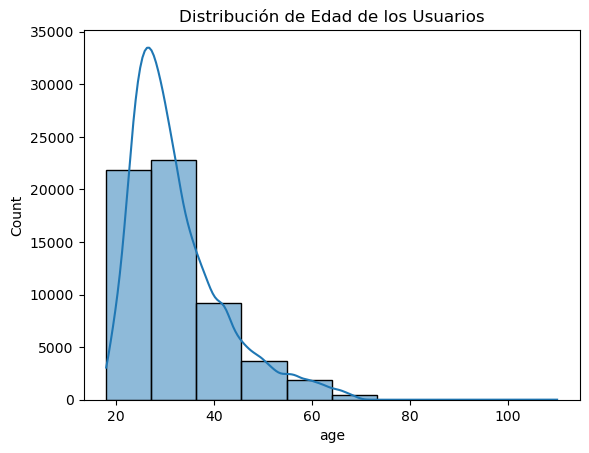

In [ ]:
#¿Cómo se distribuyen los usuarios por edad?

sns.histplot(data=df_limpio, x='age', bins=10, kde=True)
plt.title('Distribución de Edad de los Usuarios')
plt.show()

Text(0, 0.5, 'Número de perfiles')

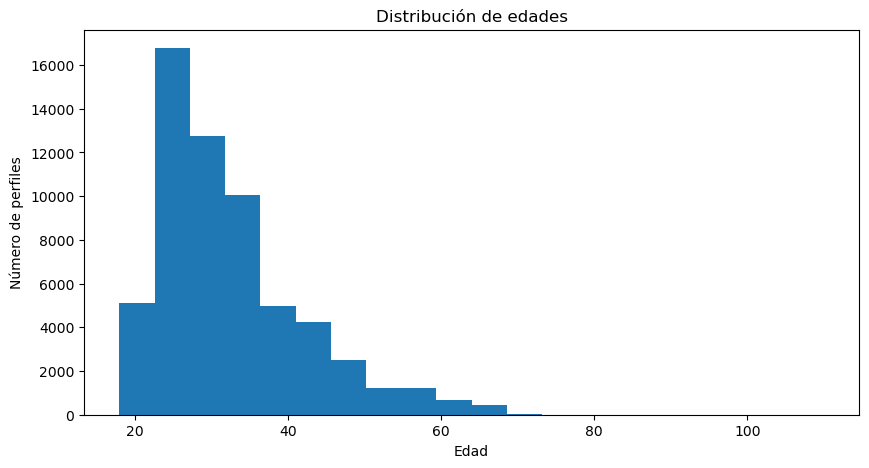

In [26]:
plt.figure(figsize=(10, 5))
plt.hist(x='age', data=df_limpio, bins=20)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Número de perfiles')

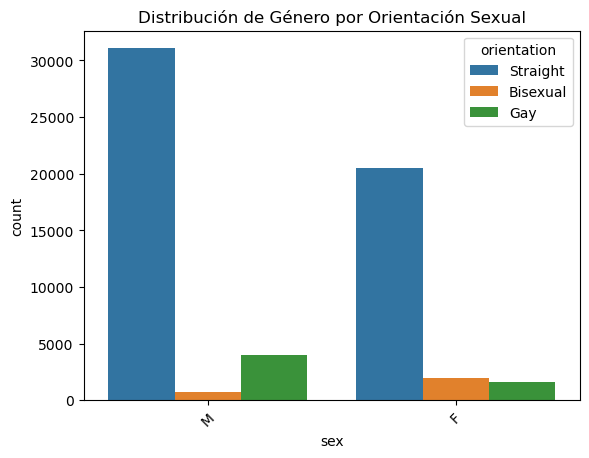

In [ ]:
#¿Cómo se distribuyen por orientación sexual?

sns.countplot(data=df_limpio, x='sex', hue='orientation')
plt.title('Distribución de Género por Orientación Sexual')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Orientación')

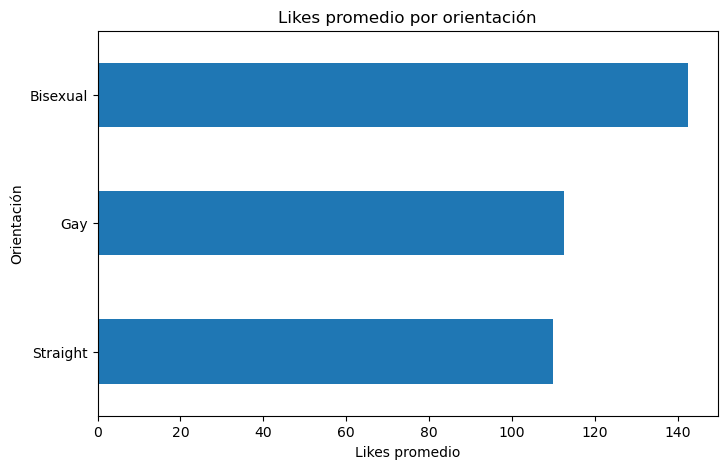

In [28]:
# Likes promedio por orientación
df_limpio.groupby('orientation')['likes_received'].mean().sort_values().plot(
    kind='barh', figsize=(8,5), title='Likes promedio por orientación'
)
plt.xlabel('Likes promedio')
plt.ylabel('Orientación')

Text(0, 0.5, 'Swipe right ratio')

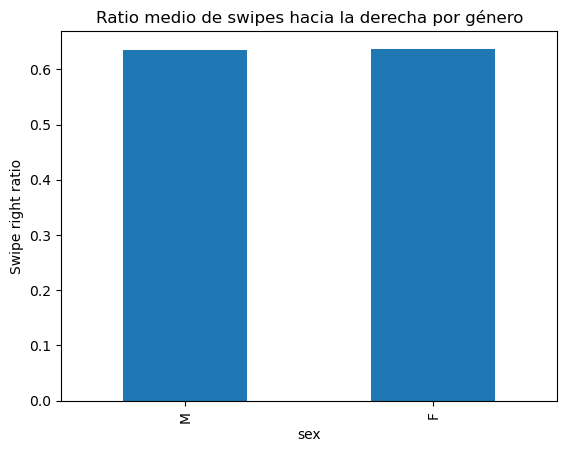

In [30]:
# Media de swipes hacia la derecha por género
df_limpio.groupby('sex')['swipe_right_ratio'].mean().sort_values().plot(
    kind='bar', title='Ratio medio de swipes hacia la derecha por género'
)
plt.ylabel('Swipe right ratio')

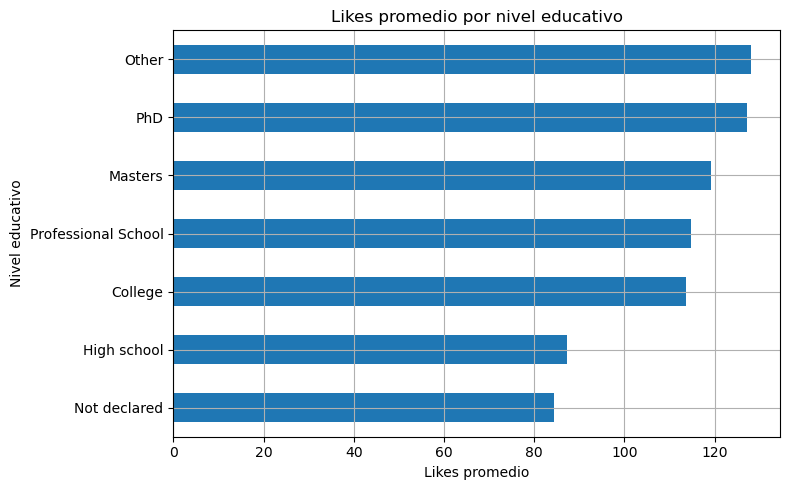

In [31]:
likes_por_educacion = df_limpio.groupby('education_grouped')['likes_received'].mean().sort_values()

likes_por_educacion.plot(
    kind='barh',
    figsize=(8, 5),
    title='Likes promedio por nivel educativo'
)
plt.xlabel('Likes promedio')
plt.ylabel('Nivel educativo')
plt.grid(True)
plt.tight_layout()
plt.show()

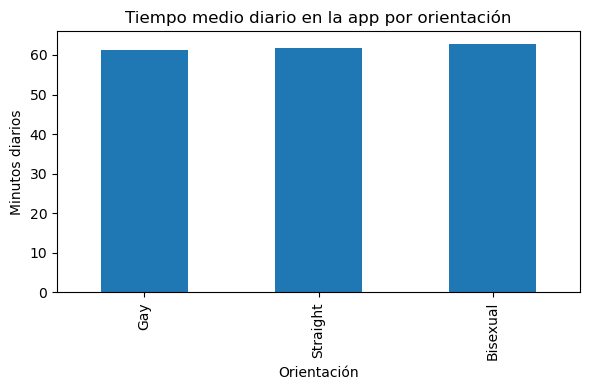

In [35]:
# Tiempo diario de uso por orientación:
tiempo_por_orientacion = df_limpio.groupby('orientation')['time_spent_daily'].mean().sort_values()

tiempo_por_orientacion.plot(
    kind='bar',
    figsize=(6, 4),
    title='Tiempo medio diario en la app por orientación'
)
plt.ylabel('Minutos diarios')
plt.xlabel('Orientación')
plt.tight_layout()
plt.show()

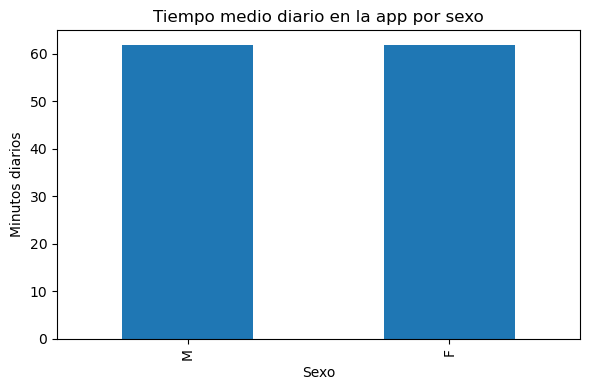

In [37]:
# Tiempo diario por sexo:

tiempo_por_sexo = df_limpio.groupby('sex')['time_spent_daily'].mean().sort_values()

tiempo_por_sexo.plot(
    kind='bar',
    figsize=(6, 4),
    title='Tiempo medio diario en la app por sexo'
)
plt.ylabel('Minutos diarios')
plt.xlabel('Sexo')
plt.tight_layout()
plt.show()

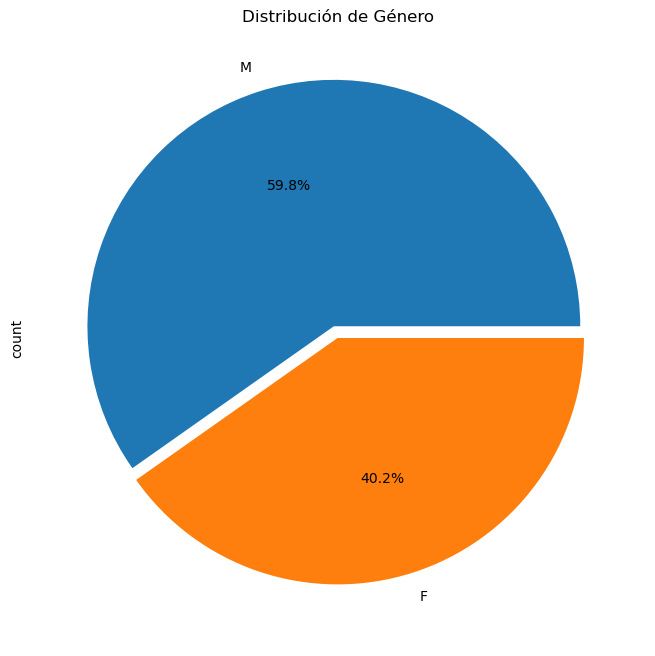

In [39]:
sex_counts = df_limpio['sex'].value_counts()
plt.figure(figsize=(8, 8))
sex_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=sex_counts.index,
    explode=[0.05 if i == sex_counts.idxmax() else 0 for i in sex_counts.index]  # Resaltar el mayor
)
plt.title('Distribución de Género')
plt.show()

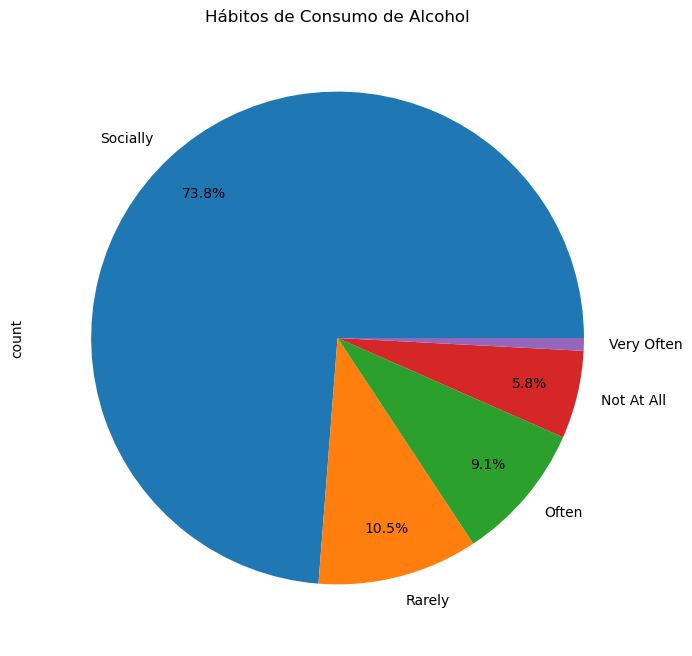

In [40]:
drinks_counts = df_limpio['drinks'].dropna().value_counts().head(5)  # Top 5 categorías
plt.figure(figsize=(8, 8))
drinks_counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',  # Mostrar % solo si >5%
    pctdistance=0.8,
    labeldistance=1.1
)
plt.title('Hábitos de Consumo de Alcohol')
plt.show()

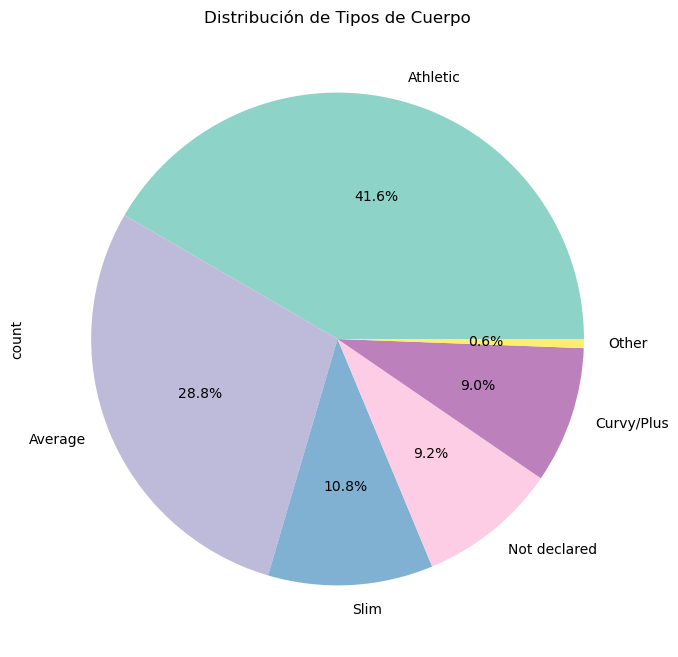

In [42]:
body_type_counts = df_limpio['body_type_grouped'].dropna().value_counts().head(6)  # Top 6
plt.figure(figsize=(8, 8))
body_type_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colormap='Set3'
)
plt.title('Distribución de Tipos de Cuerpo')
plt.show()

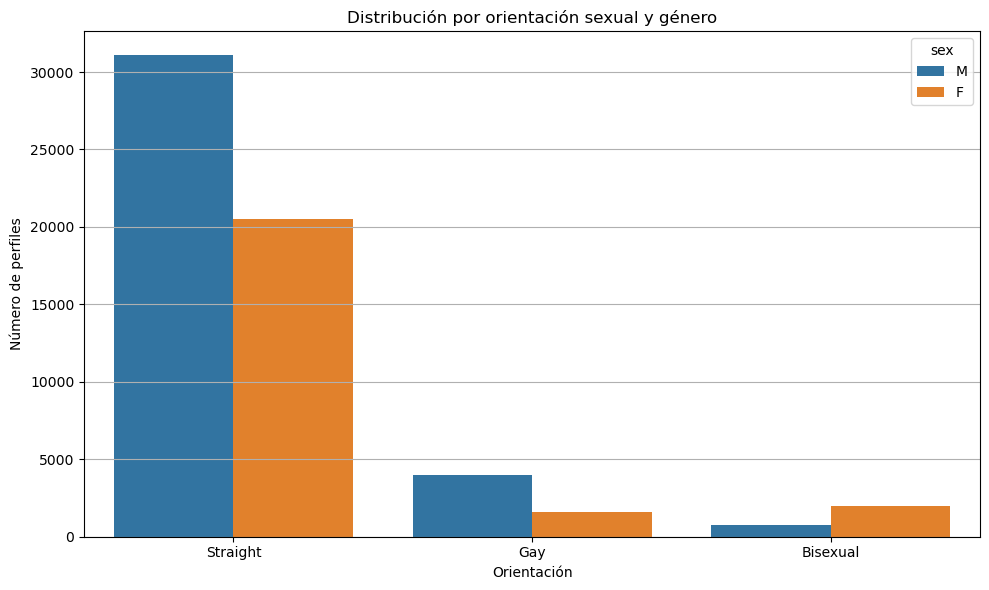

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_limpio,
    x='orientation',
    hue='sex',
    order=df_limpio['orientation'].value_counts().index
)
plt.title('Distribución por orientación sexual y género')
plt.xlabel('Orientación')
plt.ylabel('Número de perfiles')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()